<a href="https://colab.research.google.com/github/every1218/Deep-Learning/blob/main/%EC%9D%B8%EC%8A%A4%ED%86%A8!%20%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98/binary_classification_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 sigmoid를 이용한 이진 분류 - 1

**입력 데이터**

- 사진이 들어옴 (예: 강아지 or 고양이).  
- 최종 출력은 하나의 값 → **"강아지일 확률"**

---

**출력 정의**

- 머신의 출력 = $P(\text{강아지})$ 라고 정의.  
- 정답(label) $y$ 는  
  - 강아지 사진이면 $y=1$  
  - 고양이 사진이면 $y=0$

---

**학습 목표**

- 강아지면 $q=1$ 나오도록  
- 고양이면 $q=0$ 나오도록 만들자.  

👉 즉, $q$ 값이 정답에 가까워지게!

---

**수식으로 표현**

- 강아지일 땐 $q$ 를 크게 (확률 ↑)  
- 고양이일 땐 $(1-q)$ 를 크게 (확률 ↓)  
- 그래서 최종적으로 학습 목표 함수는  

$$
q^y (1-q)^{(1-y)}
$$

👉 이 값을 **최대화**시키는 게 학습의 목적!

---

### 📌 sigmoid를 이용한 이진 분류 - 2

**데이터 여러 장일 때**

- 사진이 여러 장이면, 전체 확률은 각각 확률들의 **곱**  
- 예: $P(y_1 \cap y_2) = P(y_1) P(y_2)$  
- 이게 바로 **독립 시행**이라는 개념

---

**확률 곱하기 문제**

- 확률은 $0 \sim 1$ 사이 숫자  
- 여러 개 곱하면 점점 작아짐 → 다루기 불편  
- 그래서 **log(로그)** 를 씀 → 곱이 **합**으로 바뀜

---

**Loss 함수 정의**

- 최종적으로 쓰는 함수: **Binary Cross Entropy (BCE) Loss**  
- 수식:

$$
L = - \sum_n \big[ y_n \log(q_n) + (1-y_n)\log(1-q_n) \big]
$$

- 의미:  
  - 정답일 때 → 정답 확률을 크게  
  - 오답일 때 → 오답 확률을 작게 만드는 방향으로 학습!

---

**Logistic Regression과 연결**

- sigmoid 함수를 쓰기 때문에 **logistic regression**이라고 부름  
- logit (log-odds) = $\log\left(\frac{q}{1-q}\right)$  
- sigmoid는 logit을 다시 확률로 바꿔줌  
- 그래서 분류 문제지만 이름은 regression(회귀) 붙은 것!

---

### 🎯 핵심 요약

- **sigmoid** → 입력을 $0 \sim 1$ 사이 확률로 변환  
- **학습 목표** → 정답일 땐 확률 1, 오답일 땐 확률 0에 가깝게  
- **Loss 함수** → BCE (Binary Cross Entropy)  
- **여러 데이터** → 곱 → log → 합으로 계산 단순화  
- **이름** → sigmoid 쓰니까 logistic regression이라고 부름


In [8]:
import torch

## STEP 1. 데이터 만들기

In [9]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

# case 2
# N=100
# radius1=0.3+0.05*torch.randn(int(N/2),1)
# radius2=1+0.01*torch.randn(int(N/2),1)
# theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
# theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
# class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
# class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
# class1_label=torch.ones(int(N/2),1)
# class2_label=torch.zeros(int(N/2),1)
# X=torch.vstack([class1_data,class2_data])
# y=torch.vstack([class1_label,class2_label])

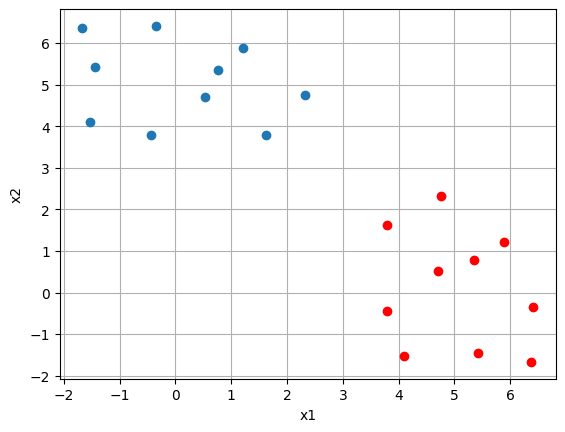

In [10]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2. 모델 만들기

In [11]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        # # case 1, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1),
        #                             nn.Sigmoid())

        # # case 1, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

        # # case 2, plain
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

        # # case 2, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1),
        #                             nn.Sigmoid())

        # # case 2, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

        # # case 2, very deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

        # # case 2, very deep, relu
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.ReLU(),
        #                             nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]]),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

In [12]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(5)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(10)])
# nn.Sequential(*[i for _ in range(5) for i in [nn.Linear(100,100), nn.Sigmoid()]])

In [13]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3. 모델 학습시키기

In [14]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 # case 1
# LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
# LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
# EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

optimizer = optim.SGD(model.parameters(), lr=LR)
# optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history =[]

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat, y)
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch: 1, train loss: 0.704
--------------------
Epoch: 2, train loss: 0.562
--------------------
Epoch: 3, train loss: 0.47
--------------------
Epoch: 4, train loss: 0.402
--------------------
Epoch: 5, train loss: 0.35
--------------------
Epoch: 6, train loss: 0.309
--------------------
Epoch: 7, train loss: 0.277
--------------------
Epoch: 8, train loss: 0.25
--------------------
Epoch: 9, train loss: 0.228
--------------------
Epoch: 10, train loss: 0.21
--------------------
Epoch: 11, train loss: 0.194
--------------------
Epoch: 12, train loss: 0.181
--------------------
Epoch: 13, train loss: 0.169
--------------------
Epoch: 14, train loss: 0.159
--------------------
Epoch: 15, train loss: 0.15
--------------------
Epoch: 16, train loss: 0.142
--------------------
Epoch: 17, train loss: 0.135
--------------------
Epoch: 18, train loss: 0.128
--------------------
Epoch: 19, train loss: 0.122
--------------------
Epoch: 20, train loss: 0.117
--------------------
Epoch: 21, tra

In [15]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward()
#     print(x.grad)
#     x.grad = None

In [16]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.0272, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0272, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

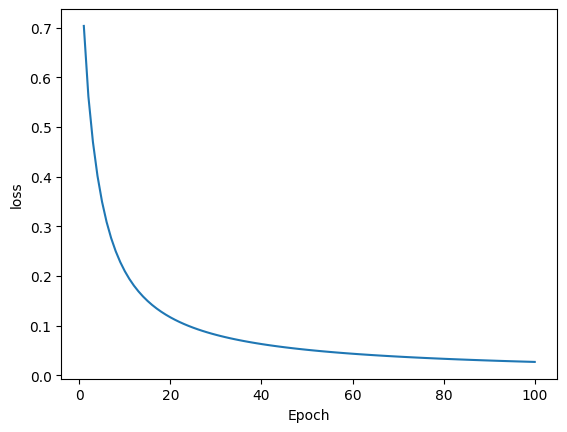

In [17]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP 4. 모델 테스트하기

In [23]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
print(X1_test.shape)
print(X2_test.shape)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)
print(X_test.shape)

torch.Size([30, 30])
torch.Size([30, 30])
torch.Size([30, 30, 2])


Text(0.5, 0.5, 'x2')

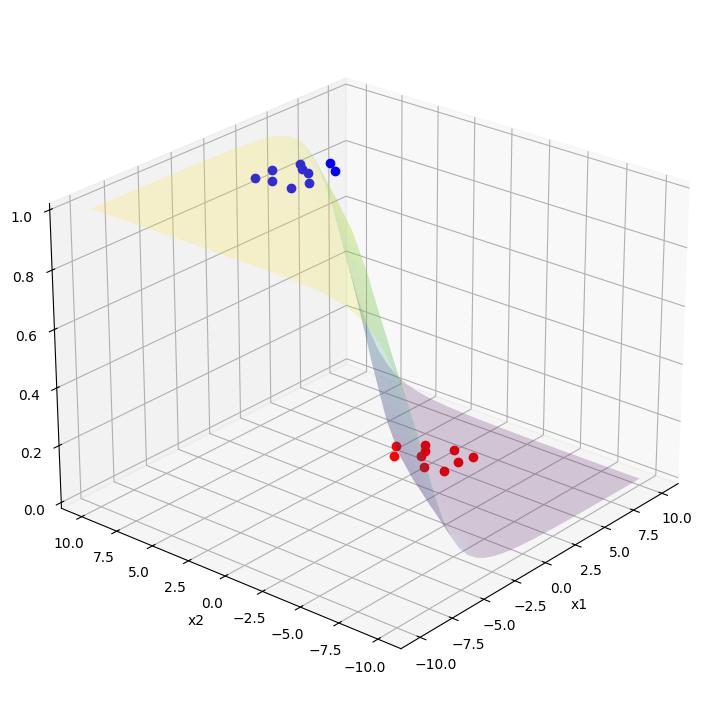

In [29]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
# x1_test=torch.linspace(-2,2,30) # case 2
# x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다
model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat = model(X_test)
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

#노란색·보라색 면(천처럼 보이는 부분) -> 30x30 격자로 넣은 모델 예측값을 시각화한것
#파란점, 빨간점 -> 원래 학습 데이터

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)